In [1]:
# Q1
#Using NumPy create random vector of size 15 having only Integers in the range 1-20.
# 1. Reshape the array to 3 by 5
# 2. Print array shape.
# 3. Replace the max in each row by 0`

In [2]:
import numpy
intial_array = numpy.random.randint(1,20,15)
print("Original array:")
print(intial_array)

reshaped_array =numpy.reshape(intial_array, (3, 5)) 
print("\nReshaped Array: \n",reshaped_array)

print("\nArray Shape: ",reshaped_array.shape)

final_array = numpy.where(reshaped_array == [[i]for i in numpy.amax(reshaped_array, axis = 1)], 0 ,reshaped_array)
print("\nMaximum value replaced by 0:")
print(final_array)

Original array:
[ 5  2  8  9 13  9 10  9  4  8  3 13  4  1  8]

Reshaped Array: 
 [[ 5  2  8  9 13]
 [ 9 10  9  4  8]
 [ 3 13  4  1  8]]

Array Shape:  (3, 5)

Maximum value replaced by 0:
[[5 2 8 9 0]
 [9 0 9 4 8]
 [3 0 4 1 8]]


In [3]:
# #Q2
# 1. Read the provided CSV file ‘data.csv’.
# https://drive.google.com/drive/folders/1h8C3mLsso-R-sIOLsvoYwPLzy2fJ4IOF?usp=sharing
# 2. Show the basic statistical description about the data.
# 3. Check if the data has null values.
# a. Replace the null values with the mean
# 4. Select at least two columns and aggregate the data using: min, max, count, mean.
# 5. Filter the dataframe to select the rows with calories values between 500 and 1000.
# 6. Filter the dataframe to select the rows with calories values > 500 and pulse < 100.
# 7. Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”.
# 8. Delete the “Maxpulse” column from the main df dataframe
# 9. Convert the datatype of Calories column to int datatype.
# 10. Using pandas create a scatter plot for the two columns (Duration and Calories).

In [4]:
import pandas as pd

data = pd.read_csv("data.csv")
data

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [5]:
data.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [6]:
data.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool

In [7]:
nan_dataframe = pd.isnull(data["Calories"])
data[nan_dataframe]

,Duration,Pulse,Maxpulse,Calories
17,45,90,112,NaN
27,60,103,132,NaN
91,45,107,137,NaN
118,60,105,125,NaN
141,60,97,127,NaN


In [8]:
data.fillna(data.mean(), inplace=True)

In [9]:
data.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories    False
dtype: bool

In [10]:
data.agg({'Duration':['min','max','count','mean'],'Pulse':['min','max','count','mean'],'Maxpulse'
:['min','max','count','mean'],'Calories':['min','max','count','mean']})

,Duration,Pulse,Maxpulse,Calories
min,15.000000,80.000000,100.000000,50.300000
max,300.000000,159.000000,184.000000,1860.400000
count,169.000000,169.000000,169.000000,169.000000
mean,63.846154,107.461538,134.047337,375.790244


In [11]:
data.loc[(data['Calories']>500)&(data['Calories']<1000)]

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
90,180,101,127,600.1


In [12]:
data.loc[(data['Calories']>500)&(data['Pulse']<100)]

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [13]:
df_modified = data[['Duration','Pulse','Calories']]
df_modified.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [14]:
del data['Maxpulse']

In [15]:
data.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [16]:
data.dtypes

Duration      int64
Pulse         int64
Calories    float64
dtype: object

In [17]:
data['Calories'] = data['Calories'].astype(numpy.int64)
data.dtypes

Duration    int64
Pulse       int64
Calories    int64
dtype: object

C:\Users\thipp\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Duration', ylabel='Calories'>

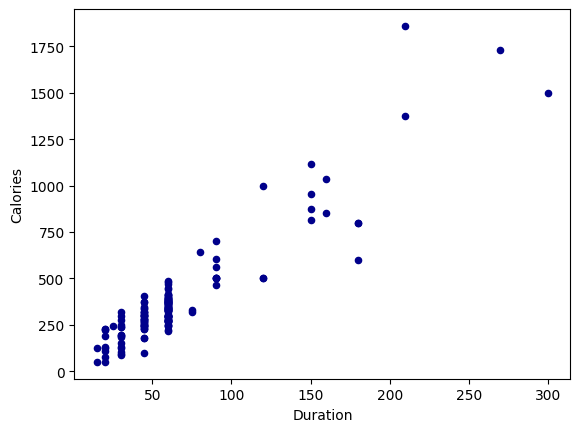

In [18]:
data.plot.scatter(x='Duration',y='Calories',c='DarkBlue')

In [19]:
# Q3
# 1. Write a Python programming to create a below chart of the popularity of programming Languages.
# 2. Sample data:
# Programming languages: Java, Python, PHP, JavaScript, C#, C++
# Popularity: 22.2, 17.6, 8.8, 8, 7.7, 6.7a

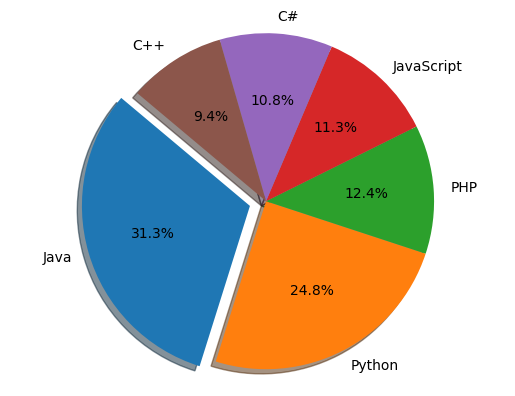

In [20]:
import matplotlib.pyplot as mp
# Data to plot
languages = ['Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++']
popuratity = [22.2, 17.6, 8.8, 8, 7.7, 6.7]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]
# explode 1st slice
explode = (0.1, 0, 0, 0,0,0)  
# Plot
mp.pie(popuratity, explode=explode, labels=languages, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

mp.axis('equal')
mp.show()